이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/master/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td></tr></table>

소스코드에 관련된 설명을 주석과 텍스트로 표기했습니다. **학번/이름 : 2171262 박소희 **

## 신경망의 수학적 구성 요소

## 신경망과의 첫 만남

**케라스에서 MNIST 데이터셋 적재하기**

In [12]:
cd /content/sample_data


/content/sample_data


In [13]:
from tensorflow.keras.datasets import mnist #텐서플로우 데이터셋에서 mnist 데이터셋을 불러올게요
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #튜플 데이터형

In [ ]:
train_images.shape #(훈련 데이터 shape : 28x28x60000) 가로 세로 28사이즈가 60000개

(60000, 28, 28)

In [ ]:
len(train_labels) #훈련 정답 레이블의 개수 : 60000개 (1, 2, 3, ... 9)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape #검증 데이터의 shape -> 28x28 크기의 이미지가 10000개

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**신경망 구조**

In [23]:
from tensorflow import keras #텐서플러우에서 keras 모듈을 불러올게요
from tensorflow.keras import layers
model = keras.Sequential([ #순서대로 모델의 층을 쌓는다.
    layers.Dense(512, activation="relu"), #입력은 512개의 노드
    layers.Dense(10, activation="softmax") #맨 마지막 층은 10개 출력, softmax 활성화 함수 적용
])

**컴파일 단계**

#### rmsprop 최적화 함수란?
AdaGrad 같은 경우 과거의 기울기를 제곱하는 방식을 사용하여 더하는 방식으로 학습을 진행함.
이러한 경우는 과거의 정보를 이용한다는 장점이 있지만 무한히 갈수록 갱신률이 점점 줄어든다는 단점이 있음.
이를 개선한 기법이 RMSProp으로, 과거의 기울기들을 일정하게 더해가는 것이 아니라
먼 과거의 기울기는 조금, 가장 최근의 기울기는 가장 많이 반영한다는 특징을 가져감.
이를 지수 이동 평균이라고함.(Exponetial Moving Average, EMA)


#### sparse_categorical_crossentropy란? - 다중 분류 손실 함수
#### categorical_crossentropy와의 차이점은 무엇일까?
전자는 훈련데이터의 label값이 정수(int)형인 경우 사용하고 ,
후자는 훈련데이터의 label값이 원-핫 벡터의 값이 경우 사용한다고 보면 된다.
위 데이터는 손글씨 분류 학습 데이터로 레이블이 정수형인 0~9까지의 숫자로 이루어져 있으므로 정수를 분류하는 sparse_categorical_crossentropy를 이용한다.

In [ ]:
model.compile(optimizer="rmsprop", #rmsprop이라는 최적화 함수를 이용
              loss="sparse_categorical_crossentropy", #레이블이 정수형이므로 위 손실함수 이용
              metrics=["accuracy"]) #정확도 측정 metrics 에 저장

**이미지 데이터 준비하기**

In [14]:
train_images = train_images.reshape((60000, 28 * 28)) #(3차원 이미지 데이터를 2차원으로 매핑)
train_images = train_images.astype("float32") / 255   #픽셀은 0~255값이므로 255로 나눈다.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
#코드 추가
print(train_images.shape) #2차원으로 모양이 바뀐 것을 볼 수 있음.
print(test_images.shape)

(60000, 784)
(10000, 784)


**모델 훈련**

**<모델 훈련시 중요하게 고려해야 할 점>**

*   한 번 데이터를 다 보는 것 : Epoch
*   모든 데이터의 손실 값을 한번에 구하는 것보다 점진적으로 loss를 체크하며 줄여나가기 위해서, 그리고 이곳저곳 퍼져있는 값들을(분산된 값들을) 일반화 하기 위해서 주로 mini-batch로 나누어서 학습을 진행합니다. + 컴퓨팅 연산을 줄이기 위해서


---


그렇다면, mini-batch로 나누었을 때 weight는 몇 번 갱신되고, 순전파와 역전파는 몇 번 일어날까?
전체 데이터 셋/배치 사이즈 x 에폭 수 만큼 일어난다.
그 이유는 batch-size는 한 덩어리에 얼마나 많은 데이터가 있는지를 의미하므로,
몇 묶음이니? 를 구하기 위해서는 전체 데이터 개수/batch_size만큼 나누어 주어야 한다. 그리고 1epoch == 한번 다 데이터를 보는 것인데 5epoch이므로 그 값에 5를 곱해주어야 한다.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) #60000개의 데이터를 몇 번 볼건지? : epoch


Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.2662 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1072 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0709 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0515 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9892


**모델을 사용해 예측 만들기**

In [ ]:
test_digits = test_images[0:10] #10개만 자름 0~9까지의 인덱스
predictions = model.predict(test_digits) #predict()메소드에 대입하여 모델의 출력값을 할당
predictions[0] #리스트 10개 중에서 첫번째 리스트만 볼게요.
#코드 추가
print(predictions) #0~1 확률을 가진 10개 요소를 가진 리스트 10개가 출력됨

1/1 [==============================] - 0s 117ms/step
[[1.58764990e-07 1.91838900e-09 9.07855792e-06 3.09388997e-05
  7.51629939e-11 3.12675837e-07 1.44871463e-12 9.99959111e-01
  1.00556328e-07 2.07936139e-07]
 [3.23440807e-09 3.74627998e-05 9.99944210e-01 6.41169117e-06
  3.39048369e-13 4.30620929e-07 3.67879345e-08 1.07163539e-13
  1.13990845e-05 9.52634673e-13]
 [8.18712522e-07 9.97823000e-01 6.34736207e-04 1.27971743e-05
  3.06924863e-04 1.43629832e-05 2.73210317e-05 4.01031895e-04
  7.77927169e-04 1.05818708e-06]
 [9.99983549e-01 1.61949162e-10 4.09911854e-06 1.19137988e-08
  1.29355628e-08 1.65774850e-06 8.43458452e-07 7.73751890e-06
  1.36001399e-09 2.12813438e-06]
 [1.54607221e-06 1.89364480e-09 5.26340671e-07 1.41937386e-08
  9.98913646e-01 5.71748387e-07 1.28007025e-06 4.37196941e-05
  1.46960633e-06 1.03712839e-03]
 [1.53131783e-08 9.99569595e-01 2.66377242e-06 1.78303239e-07
  1.12604117e-04 1.47854191e-08 6.42734577e-08 3.03205597e-04
  1.15809462e-05 7.33334602e-08]
 [1.8

In [ ]:
predictions[0].argmax() #리스트 값들 중에서 가장 큰 값의 인덱스 fetch

7

In [ ]:
predictions[0][7] #그 인덱스의 값을 fetch

0.9999591

In [ ]:
test_labels[0] #정답 레이블이 무엇인지 확인

7

**새로운 데이터에서 모델 평가하기**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels) #이미지와 정답을 파라미터로 주어서 손실과 정확도 값을 구하기
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9790
테스트 정확도: 0.9789999723434448


## 신경망을 위한 데이터 표현

**딥러닝에서 데이터는 주로 scalar, vector, matrix 값으로 나타내지고 3차원 벡터부터 "텐서"라고 부른다.**

### 스칼라 (랭크-0 텐서)

*   하나의 숫자만 담고 있는 텐서를 스칼라 텐서, 0차원 텐서라고 부른다.
*   스칼라 텐서의 축의 개수는 0이다(number of dimension == 0)
*   텐서의 축 개수를 rank라고도 부른다.

In [17]:
import numpy as np
x = np.array(12)
x #x는 스칼라 텐서이다.한 개의 숫자만 가지고 있으므로

array(12)

In [ ]:
x.ndim #축이 없다고 보면 됨.

0

### 벡터 (랭크-1 텐서)

우리가 흔히 알고 있는 숫자의 배열을 벡터 또는 1D 텐서라고 부른다.
1D 텐서는 dimension이 1이므로 오직 1개의 축을 가진다.

In [18]:
x = np.array([12, 3, 6, 14, 7]) #이 벡터는 한 개의 축에 배열의 5개의 원소를 가지고 있으므로 1D 텐서 또는 벡터이다.
x
print(x.shape) #(5,)

(5,)


**<주의점>**   
5차원 벡터 VS 5차원 텐서  
-> 5차원 벡터는 하나의 축을 따라 5개의 차원을 가진 것.  
-> 5차원 텐서는 5개의 축을 가진 것.  
따라서 위 배열은 5차원 벡터가 된다.



In [ ]:
x.ndim #축의 개수가 1개임.

1

### 행렬 (랭크-2 텐서)

**벡터의 배열이 행렬 또는 2차원 텐서이다.  
행렬에는 보통 열과 행이라는 2개의 축이 있다.  
행렬은 숫자가 채워진 격자라고 생각하면 이해하기 수월하다.**


In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim #축의 개수가 2개

2

### 랭크-3 텐서와 더 높은 랭크의 텐서

**앞서 제시한 행렬을 새로운 배열로 합치면 직육면체 형태로 나타낼 수 있겠다.  
그럼 3D 텐서가 만들어지는 것이다.  
보통 3차원부터 텐서라고 부르기도 한다.**  


In [ ]:
x = np.array([[[5, 78, 2, 34, 0], #3D 텐서
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim #축이 3개

3

**위와 같은 방식으로 3차원 텐서들을 하나의 축 기준으로 나열하면 4차원 텐서가 되고,  
4차원 텐서를 ~  5차원 텐서가 만들어진다.  
딥러닝에서는 보통 0차원 ~ 4차원까지의 텐서를 다루며,  
동영상을 다룰 때는 5차원 텐서가 만들어지기도 한다.**

### 핵심 속성

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim #훈련 입력 이미지의 차원은 흑백 이미지가 60000개 있는 경우이므로 (b,c,h,w)에서 채널 차원을 제외한 3차원.

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype #각각의 데이터 타입은 int8bit이다. 즉, 2^8인 0~255범위로 표현이 가능하다.(unsigned 니까 ) 1byte 만큼

dtype('uint8')

**다섯 번째 이미지 출력하기**

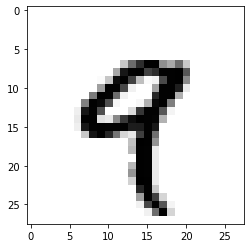

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4] #인덱스 0부터 시작하므로 5번째 샘플을 뽑아줘 라는 뜻이다.
plt.imshow(digit, cmap=plt.cm.binary) #cmap은 colormap의 약자로 0~1까지 숫자를 RGB로 표현해줌.
plt.show() #화면에 보여줘

In [ ]:
train_labels[4]

9

### 넘파이로 텐서 조작하기

In [ ]:
my_slice = train_images[10:100] #훈련 이미지 10~99까지 90개 fetch
my_slice.shape #모양 찍어보기

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :] #훈련 이미지 10~99까지 90개 뽑아내는데 가로와 세로 크기는 일정함
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28] #훈련 이미지 90개를 가로 세로 인덱싱을 하여 뽑아냄
my_slice.shape #모양은 위 결과와 동일

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:] #이미지 개수는 동일, 가로, 세로 크기를 14~끝까지 값만 뽑아냄
#코드 추가
print(my_slice.shape) #결과는 가로 세로 크기를 인덱싱했으므로 14x14가 됨 (60000, 14, 14)

(60000, 14, 14)


In [ ]:
my_slice = train_images[:, 7:-7, 7:-7] #이미지 개수 동일, 가로 세로 크기를 7~-8까지 즉, 7~20까지 자름 20-7+1 = 14
#코드 추가
print(my_slice.shape) #(60000, 14, 14)

(60000, 14, 14)


### 배치 데이터

**데이터 텐서의 첫번째 축은 배치 사이즈를 나타낸다.  
훈련시, 데이터를 한꺼번에 모델에 집어넣지 않고 다양한 경우의 수를 구하기 위해서, 한번 turn할 때마다 CPU에 Load하는 시간을 줄이기 위해서   
배치 사이즈로 나누어서 연산하는데 우리는 그 텐서들을 배치 데이터라고 부른다.**

In [ ]:
batch = train_images[:128] #배치 데이터를 0~127번째의 데이터로 정함.
print(batch.shape) #(128, 28, 28)

(128, 28, 28)


In [ ]:
batch = train_images[128:256] #128~255번재 데이터 총 128개
print(batch.shape)

(128, 28, 28)


In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)] #128 * 3 : 128 * 4이므로 batch의 개수는 128(4-3) = 128개이다.
print(batch.shape) #(128, 28, 28)

(128, 28, 28)


### 텐서의 실제 사례

### 벡터 데이터

**(샘플, 특징) 크기의 2D 텐서**  
사람의 나이, 집값, 소득분위로 구성된 인구 통계 데이터라면 각 사람은 3개의 값을  
가진 벡터로 구성이 되고(한 축에 3개의 데이터) 인구가 10만명이라면 (100000, 3) 크기의 벡터에 저장된다.

### 시계열 데이터 또는 시퀀스 데이터

**(샘플, timestep, feature) 크기의 3D텐서**  
시계열 데이터는 데이터에서 어느 시간에 집중할 것인지를 나타내는 시간축을 포함한다.


*   주식 가격 데이터셋
1분마다 현재 주식 가격, 최고 가격과 최소 가격을 저장한다고 가정하자.  
하루동안의 거래 시간이 390분이라고 하면 250일의 데이터는 (250, 390, 3(최소, 최대, 현재)) 의 모양을 갖는 3D텐서라고 볼 수 있다.



### 이미지 데이터

**(batch size, channel, height, weight) 크기의 4D 텐서**  
우리가 흔히 알고 있는 이미지는 높이, 너비, 3채널의 3차원으로 구성된다.  
하지만 훈련시에 주로 배치사이즈로 나누어 학습하기 때문에 batch size까지 포함하게 되면 4차원 입력이 모델에 들어가게 된다.  
흑백 이미지의 경우 채널의 사이즈가 1인데 생략하기도 하고 고려하기도 한다.  
예) 가로 256 세로 256 크기의 흑백 이미지, 배치 사이즈 64  
(64, 1, 256, 256)이 된다. -> (b, c, h, w)

### 비디오 데이터

**(batch, frames, height, width, channels) 크기의 5D 텐서**  
하나의 비디오는 프레임의 연속으로 되어 있고, 프레임은 하나의 이미지이다.  
즉, 영화를 볼 때 필름이 빠르게 지나가는 원리라고 볼 수 있음.  
예) 60초짜리 144X256 비디오 클립을 초당 4 frame으로 샘플링하면 240 프레임이 되고(4x60s = 240frame)  
배치 크기가 4라면 (4, 240, 144, 256, 3)크기의 5D텐서에 저장될 수 있다.  

## 신경망의 톱니바퀴: 텐서 연산

### 원소별 연산

원소별 연산은 텐서에 있는 각 원소에 독립적으로 적용된다.  
병렬 구현이 가능한 연산이라고 볼 수 있다. (각각 적용되기 때문에)

In [ ]:
def naive_relu(x): #ReLu 연산 -> for 이중루프 이용
    assert len(x.shape) == 2 #2D 배열
    x = x.copy() #입력 텐서를 바꾸지 않고 복사하기 위함
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) #인덱스에서 가장 큰수를 뽑아내서 저장
    return x

In [ ]:
#덧셈 연산 구현
def naive_add(x, y):
    assert len(x.shape) == 2 #2D 행렬
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j] #각 인덱스 값을 행과 열 반복하며 더해서 저장
    return x

In [ ]:
import time
import numpy as np

x = np.random.random((20, 100)) #20행 100열의 행렬 생성
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y #행렬끼리 덧셈
    z = np.maximum(z, 0.) #z행렬에서 0보다 큰 값을 요소로 저장함 0보다 큰 값이 없다면 0을 저장
print("걸린 시간: {0:.2f} s".format(time.time() - t0)) #걸린 시간 측정 사이클 (현재시간 - 반복문 초기 시간)

걸린 시간: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y) #함수 호출
    z = naive_relu(z)   #함수 호출
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.01 s


### 브로드캐스팅

앞에서 살펴본 naive_add 덧셈 함수는 동일한 크기의 2D 연산만 지원한다.  
하지만, 2D 텐서와 벡터끼리의 합과 같은 크기가 다른 두 텐서의 덧셈은 어떨까?

In [ ]:
import numpy as np
X = np.random.random((32, 10)) #32x10 행렬 생성
y = np.random.random((10,)) #10개 요소를 갖는 벡터 생성
print(X.shape) #(32, 10)
naive_add_matrix_and_vector(X,y)

(32, 10)
(32, 10)


array([[1.04714498, 1.00258851, 1.11708867, 1.27300102, 0.30044812,
        1.14928263, 1.33761414, 1.55698724, 1.18614704, 1.30400832],
       [1.94014694, 0.94928772, 0.58438675, 1.33779909, 0.19509779,
        1.4459182 , 1.77302338, 0.6734462 , 1.45011847, 1.23142155],
       [1.02821149, 1.1927577 , 0.61491968, 0.70698643, 1.10238145,
        1.71807967, 1.57809976, 0.68874152, 1.81574557, 1.28847812],
       [1.17440317, 0.94873033, 0.95941813, 1.02113926, 0.46209255,
        1.87914094, 1.88469713, 1.12533658, 1.23042616, 1.851788  ],
       [1.40237054, 1.41259725, 1.42201723, 0.73939994, 0.52835822,
        1.7214764 , 1.74064409, 1.27538031, 1.46693987, 1.74358709],
       [1.62359388, 1.10769508, 1.1239926 , 1.56416953, 0.80172617,
        1.16040192, 1.54204124, 1.41054757, 1.5551644 , 1.34317542],
       [1.49977607, 0.88997164, 1.43691027, 1.07091793, 0.76581178,
        1.16552932, 1.26282353, 1.15931805, 1.39511517, 0.9145464 ],
       [1.97485375, 1.36503626, 1.4317904

In [ ]:
y = np.expand_dims(y, axis=0) #배열의 형태를 맞추기 위해 dimension 0축으로 확장 (1, 10)
print(y.shape)  #(1, 10)

(1, 10)


In [ ]:
Y = np.concatenate([y] * 32, axis=0) #0축 기준으로 각 32개의 y배열을 붙여준다.
print(Y.shape) #(32, 10)

(32, 10)


In [ ]:
def naive_add_matrix_and_vector(x, y): #행렬과 벡터의 덧셈 과정
    assert len(x.shape) == 2 #2D 배열
    assert len(y.shape) == 1 #1D 벡터
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]): #행에 대해
        for j in range(x.shape[1]): #열에 대해
            x[i, j] += y[j] #브로드 캐스팅하여 각각 더한다.
    print(x.shape) #(32, 10)
    return x

**아래 사진은 broadcasting 과정**  
모양이 달라도, 각 텐서값에 대해 연산을 해주기 때문에  
결국에는 모양이 같게 복사하여 연산한 값과 동일하다.  

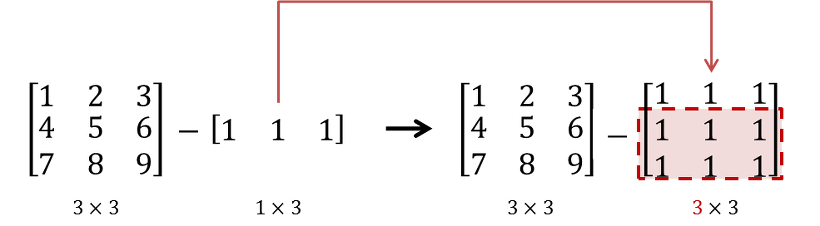

In [ ]:
#원소별 maximum 연산 하기
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

print(x)
print(y)
z = np.maximum(x, y) #출력 크기는 x와 동일 #(64, 3, 32, 10)
print(z)

[[[[5.60880754e-01 1.99238659e-01 3.74120795e-01 ... 9.00095552e-01
    6.69050450e-02 5.29454016e-01]
   [1.30251260e-01 4.59732328e-01 5.20984249e-01 ... 2.56310534e-01
    7.58540645e-01 9.16348066e-01]
   [5.71043346e-01 1.18733500e-01 6.51664345e-01 ... 5.18813986e-01
    6.60787263e-01 7.56952265e-01]
   ...
   [1.47193231e-02 9.49325151e-01 9.23118253e-01 ... 9.30584396e-01
    8.72808058e-01 7.92676626e-01]
   [5.54441981e-01 3.43047777e-01 1.41894031e-01 ... 9.03638576e-01
    4.40463369e-01 8.15417719e-01]
   [4.46883414e-01 7.41793987e-01 9.38046152e-01 ... 5.19695897e-02
    7.26766741e-01 3.33900501e-01]]

  [[5.18891574e-01 1.12314520e-02 4.82108690e-01 ... 2.04855926e-01
    4.12833493e-01 4.17272630e-01]
   [9.95984304e-01 8.25323261e-01 2.09359811e-01 ... 9.92699321e-01
    6.72602393e-02 3.68822509e-01]
   [2.06242092e-01 4.62849807e-02 2.17345024e-01 ... 6.13952575e-02
    1.14098743e-01 8.60443680e-01]
   ...
   [2.62874431e-01 4.19488385e-01 4.30277833e-01 ... 1.48

### 텐서 곱셈

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y) #그대로 요소끼리 곱해준다.

x = np.random.random((3,3))
y = np.random.random((3,3))
z = naive_matrix_dot(x,y)

[0.00133272 0.88185765 0.65213444]
(3,)
[0.00133272 0.88185765 0.65213444]
(3,)
[0.00133272 0.88185765 0.65213444]
(3,)
[0.79208739 0.74114528 0.29354999]
(3,)
[0.79208739 0.74114528 0.29354999]
(3,)
[0.79208739 0.74114528 0.29354999]
(3,)
[0.72753681 0.89206182 0.81370798]
(3,)
[0.72753681 0.89206182 0.81370798]
(3,)
[0.72753681 0.89206182 0.81370798]
(3,)


In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]): #0축에 대해서 루프돌면서
        z += x[i] * y[i] #그대로 곱해주고 z의 요소에 할당
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    #텐서의 모양이 다른 경우
    assert len(x.shape) == 2 #2D
    assert len(y.shape) == 1 #1D
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0]) #행과 같은 크기의 0이 채워진 Z벡터 생성
    for i in range(x.shape[0]): #행만큼
        for j in range(x.shape[1]): #열만큼
            z[i] += x[i, j] * y[j] #X행과 Y벡터 사이에서 곱셈 연산
    return z #모양은 벡터의 크기만큼 반환됨(아래 사진 첨부 참조)

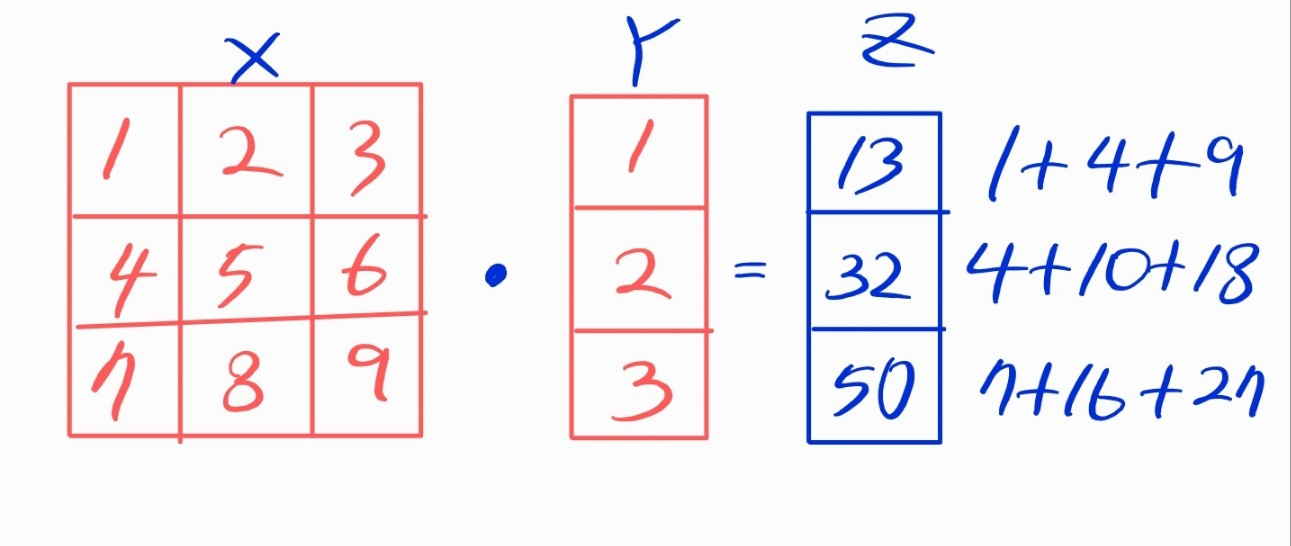

In [ ]:
def naive_matrix_vector_dot(x, y):
#행렬-벡터 dot matrix는 교환 법칙이 성립하지 않는다
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
  #행렬 간의 dot-matrix는 X행과 Y열이 같은 크기여야 연산 가능하다
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1])) #0으로 값 초기화
    for i in range(x.shape[0]): #행에 대해서
        for j in range(y.shape[1]): #열에 대해서
            #row와 column에 각 요소값들 저장
            #루프가 rowxcolumn만큼 돈다.
            row_x = x[i, :]
            print(row_x)
            column_y = y[:, j]
            print(column_y.shape)
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 텐서 크기 변환

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) #(60000, 28, 28) -> (60000, 784)로 변환이 가능
#코드 추가
print(train_images.shape) #(60000, 784)

(60000, 784)


In [ ]:
import numpy as np

x = np.array([[0., 1.], #3행 2열의 배열을 만듬
             [2., 3.],
             [4., 5.]])
print(x.shape) #(3, 2)

(3, 2)


In [ ]:
x = x.reshape((6, 1)) #3x2 = 6x1로 변환
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = x.reshape((2, 3)) #6x1 = 2x3으로 reshape 가능
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [ ]:
x = np.zeros((300, 20)) #300행 20열의 행렬을 만듦
print(x.shape)
x = np.transpose(x) #transpose -> 행렬의 열과 행의 위치를 바꿈
x.shape #(20, 300)

(300, 20)


(20, 300)

### 텐서 연산의 기하학적 해석

텐서 연산을 조작하는 기법은 선형대수에서 배웠던 기하학적 공간에 있는 좌표 포인트로   
옮겨서 해석할 수 있기 때문에 기하학적으로 해석이 가능하다.  
예를 들어 2D 벡터를 단순 오른쪽 방향이나 왼쪽 방향으로 회전시키는 원리는  
SIN, COS 함수를 이용해 구현할 수 있다. 텐서도 동일하게 적용됨.

### 딥러닝의 기하학적 해석

딥러닝에서 신경망이 하는 일은 주로 2개 이상의 클래스를 깔끔하게 분류하는 작업을 한다.   
손으로 종이 공을 조금씩 펼쳐서 값을 확인하는 것처럼 딥러닝의 신경망 연산을 이용하면 3D 공간에서 간단한 변환들을 이용해 구현한다.  
즉, 복잡하고 분산되어 있는 기하학적 데이터들에 대해 분류가능한 깔끔한 경계를 찾고 분류하는 일 수행

## 여기까지 4주차 과제 제출

## 신경망의 엔진: 그레이디언트 기반 최적화

초기에는 가중치 행렬이 작은 난수로 채워져 있다.(무작위 초기화 단계)  
훈련은 다음과 같은 훈련 루프 안에서 발생한다.  
1. 샘플 x와 이에 대응하는 y의 배치 추출  
2. forwardpass를 진행하고 예측 y_pred을 도출  
3. y_pred와 y_true 차이를 측정하여 손실 도출  
4. 손실이 조금씩 감소되도록 모델의 모든 가중치 update  

4번 단계에서 문제가 생긴다.  
가중치 값이 개별적으로 여러개가 있을 때 값이 증가 or 감소 or 크기는 어떻게 결정??  
교재에서 제시한 방법은 관심있는 하나의 가중치만 다른 값 적용, 나머지 가중치 요소들은 고정해보는 것  
####하지만 이러한 접근 방식은 모든 가중치 행렬의 원소마다 forwardpass를 진행해야 하므로 매우 비효율적이다.  
####더 나은 방법인 경사하강법이 존재한다.
####<경사하강법 가정>
#####모델에 사용하는 모든 입력을 매끄럽고 연속적인 2,3,4....n차 함수로 가정
연속 함수에서 어떤 변수에 대해 미분 가능하다는 점을 이용하여 예측 가능한 방향으로 하강하는 것을 도와줌  
특히, 그래디언트(미분값)을 이용하면 가중치를 다양한 방향으로 이동했을 때, 손실이 얼마나 변하는지를 알 수 있음.

### 도함수란?

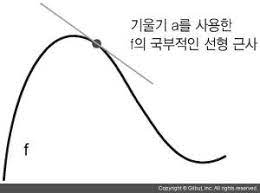

다음의 연속적인 함수를 가정해보자.  
이 함수는 매끈하므로 x의 변화량이 충분히 작다고 가정할 때,  
어떤 지점 p에서 기울기 a의 선형함수로 f라는 함수를 근사화 할 수 있다.  
따라서 다음과 같은 수식이 만들어짐  
f(x+epsilon_x) = y + a * epsilon_x  
이 근사치는 epsilon_x가 p에 충분히 가까울 때 유효하다. 위 식에서 기울기를 f의 도함수라고 부른다.  
####즉, a의 절댓값(도함수의 크기)는 이러한 증가나 감소가 얼마나 빠르게 일어나는지? 를 알려준다는 것이다.  


---
####모든 점에서 미분 가능하다는 것은 도함수를 유도할 수 있다는 의미.  
함수를 미분할 수 있다는 것은 f(x)의 값을 최소화하는 x를 찾는 작업인 최적화(optimization)을 할 수 있다는 것을 의미..  
즉, 내가 epsilon_x만큼 x를 업데이트 하고 싶을 때, x의 도함수를 알고 있다면,  
x가 바뀜에 따라 f(X)가 어떻게 바뀔지 알 수 있.  



### 텐서 연산의 도함수: 그레이디언트

텐서 연산(또는 텐서 함수)의 도함수를 그래디언트(gradient)라고 부른다.  
텐서 함수의 그래디언트는 함수가 설명하는 다차원 함수의 곡률(curvature)을 나타낸다.  
grad(loss_value(함수이름), w0)가 나타내는 것은 무엇일까?  
w0에서 함수f(w)의 그래디언트를 의미한다.
w0 근처에서 w에 대한 loss_value 함수의 gradient   
하나의 가중치를 가진 f(x)의 도함수는 곡선 f의 기울기이다.  
####따라서 grad(loss_value,w0)는 w0에서 가장 가파르게 상승하는 방향과 그 방향의 기울기를 나타낸다고 볼 수 있다.  
즉 loss_value가 바뀌는 방향과 크기를 나타냄.  
편도함수는 f의 특정 방향 기울기를 나타냄.

### 확률적 경사 하강법

어떤 미분가능한 함수가 주어지면 이 함수의 최솟값도 구할 수 있다.  
함수의 최솟값은 도함수(기울기)값이 0인 값이라고 우리는 알고 있다.  
grad(f(w),w) = 0을 만족하는 식을 풀면 해결이 된다.  
이 식은 모델의 가중치 개수 n개의 변수로 이루어진 다항식이라고 볼 수 있다.  
그러나 n=2 or n=3의 다항식을 푸는 것은 비교적 간단하지만 대부분의 딥러닝 모델의 파라미터의 개수가 수천개이상이다.  
따라서 현재 손실 값을 토대로 하여 다음 손실값을 업데이트하는 점진적으로 경사하강법을 적용하여 손실이 0에 수렴하게 하는 w를 찾는 방법을 사용할 수 있다.  


1.   샘플 x와 타겟 y_true를 추출한다
2.   x 샘플로 모델에 입력하고 그 출력 y_pred를 구한다.
3.   해당 배치에서 y_pred와 y_true의 오차를 계산하여 모델의 손실을 계산
4.   모델 파라미터에 대하여 손실 함수의 gradient(도함수값)를 계산 => backward pass
5.   그래디언트의 반대방향으로 파라미터를 조금씩 이동

우리는 이것을 미니 배치 확률적 경사하강법이라고 부른다.
확률적(stochastic)의 의미는 각 배치 데이터가 무작위로 선택된다는 의미  
아래 사진은 모델 파라미터가 하나고 샘플(batch-size 1)이 한 개일 때,  
점진적으로 파라미터의 값이 변하는 그래프 이다. (경사하강법)  




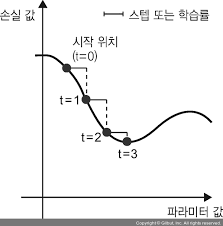

손실함수를 더 구체적으로 이해하기 위해 파라미터가 2개인 2D 손실함수의 경사하강법을 시각해볼 수 있다.  
하지만 신경망이 실제 훈련하는 과정을 파라미터가 백만개라면, 정확하게 공간 표현이 불가능하기 때문에 저차원 표현으로 얻은 인사이트가 항상 일치하지  
않는다는 것을 유념해야 한다.  
또한 업데이트 시 다음 가중치를 갱신할 때 현재 그래디언트 값뿐만 아니라  
지금까지 업데이트된 가중치를 여러 가지 방식으로 고려하는 SGD 최적화 방법이 존재.  
SGD, Adagrad, RMSprop 등이 있는데 이러한 것들을 모두 최적화 방법(Optimization method)라고 부른다.  
특히 최적화 방법 중에서 모멘텀은 SGD의 문제점인 수렴 속도와 지역 최솟값을 모두 해결하는 기법이다.  


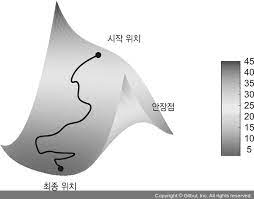

### **(추가) 지역 최솟값 문제**
초기 파라미터 값의 위치를 어떻게 설정하느냐에 따라 경사하강 과정에서 기울기 == 0인 지점이 2개 이상일 경우, 지역 최솟값에 도달할 수 있다.  
그 지점 근처에서는 왼쪽으로 또는 오른쪽으로 이동해도 손실값이 증가하므로 계산과정에서 충분히 착각 가능하다.  
물리학적으로 모멘텀 계산방식을 이용하면 현재 기울기 값뿐만 아니라 이전 가속도를 통한 속도를 함께 고려하여 W를 업데이트하는 방식을 이용하기 때문에 이러한 문제를 피할 수 있다.   


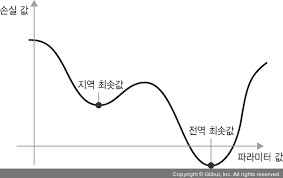

### 도함수 연결: 역전파 알고리즘

파라미터의 개수가 여러개인 복잡한 식의 그래디언트를 어떻게 계산할 수 있을까?  
2개 이상의 층을 가진 모델의 경우 어떻게 그래디언트를 전파할 수 있을까?  
역전파 알고리즘은 이것을 해결해준다.  

#### 연쇄 법칙

역전파는 도함수를 이용해서 기초적 연산을 조합하여 복잡한 연산의 그레디언트를 쉽게 계산할 수 있는 방법이다.   
미적분의 연쇄 법칙을 이용하면 여러가지 층으로 연결된 함수의 도함수를 쉽게 구할 수 있다.    
연쇄 법칙을 간단히 이야기하면 사슬처럼 f와 g의 도함수를 알고 있다면 fg의 도함수를 쉽게 지워지는 방식으로 구할 수 있다는 것이다.   (x1 = g(x), y = f(x1))일 때, grad(y,x) == grad(y, x1) * grad(x1, x) -> 연쇄 법칙

#### 계산 그래프를 활용한 자동 미분

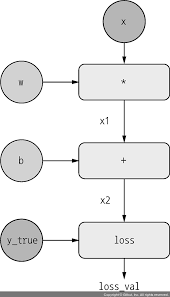

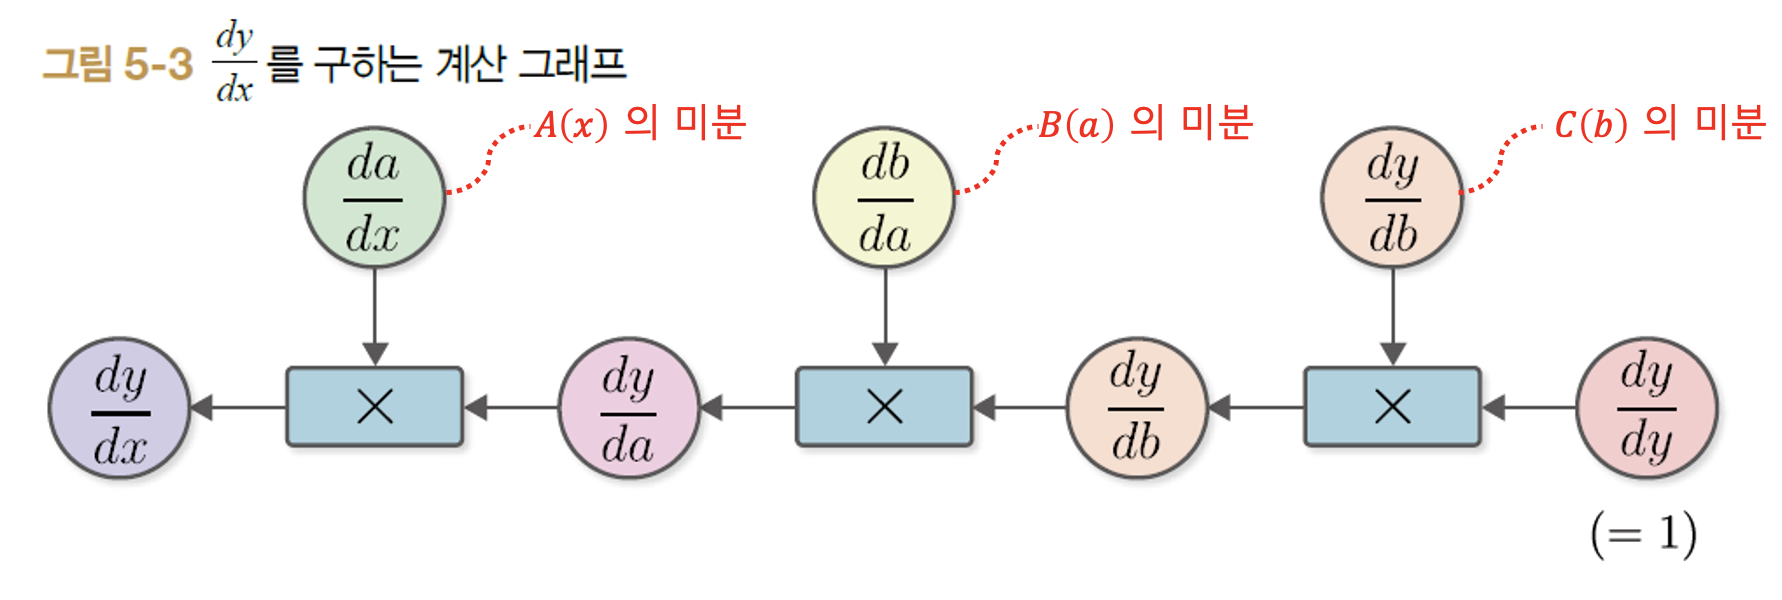

역전파를 계산 그래프 관점에서 생각해보자.  
위 그래프는 입력 데이터 샘플 x가 주어졌을 때, feedforward과정을 거쳐 도출된 prediction값과 y_true값을 이용하여 loss값을 구하는 과정을 보기 쉽게 구조화한 것이다.  
아래 사진은 dy/dx를 구하는 과정을 연쇄 법칙을 통해 알기 쉽게 나타낸 것이다.  
사진과 같이 b, a, x에 대해 각각 미분하면 함수가 곱해진 형태이기 때문에 연쇄법칙에 따라 지워지고 dy/dx만 남게 되는 구조이다.  
필자는 위 사진들을 통해 역전파 과정이 어떻게 이루어지는지 쉽게 알 수 있어 좋았다.  

#### 텐서플로의 그레이디언트 테이프

그레이디언트 테이프란 역전파 과정에서의 미분 과정을 자동으로 실행할 수 있는 일종의 API이다.  
API는 파이썬의 해당 블록안의 모든 텐서 연산을 계산 그래프 형태로 기록한다음, 이러한 그래프 형태를 이용해서 변수에 대한 gradient를 계산할 수 있다.  


In [3]:
import tensorflow as tf
x = tf.Variable(0.) #초기값 0으로 스칼라 변수를 설정
with tf.GradientTape() as tape: #gradient tape 블록 시작점
    y = 2 * x + 3 #블록 안에서 텐서 연산 진행
grad_of_y_wrt_x = tape.gradient(y, x) #tape를 사용, x에 대한 출력 y의 gradient 계산
#추가
print(grad_of_y_wrt_x) #tf.Tensor(2.0, shape=(), dtype=float32) gradient 값 2 출력, 스칼라값이므로 shape X

tf.Tensor(2.0, shape=(), dtype=float32)


In [4]:
x = tf.Variable(tf.zeros((2, 2)))        #크기가 2 by 2인 초기값 0 변수 생성
with tf.GradientTape() as tape:          #블록의 시작점
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)    #x에 대한 y출력값을 tape를 이용하여 도출
print(grad_of_y_wrt_x)                   #(2, 2) 크기의 텐서로 y = 2*x+3의 곡률을 나타낸다.

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [9]:
W = tf.Variable(tf.random.uniform((2, 2))) #2by2 크기의 랜덤 변수 생성
b = tf.Variable(tf.zeros((2,)))            #0으로 초기화된 1 dimension 크기의 변수 선언

x = tf.random.uniform((2, 2))              #2by2 랜덤 변수 생성
with tf.GradientTape() as tape:            #tape 블록 시작
    y = tf.matmul(x, W) + b                #행렬곱함수를 통해 y도출
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])   #리스트를 입력으로 넣어서 출력 도출
print(grad_of_y_wrt_W_and_b) #w에 대한 그래디언트(2,2), b에 대한 그래디언트 값(2, ) 각각 출력

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.7141578 , 0.7141578 ],
       [0.74324167, 0.74324167]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


## 첫 번째 예제 다시 살펴보기

모델, 층, 손실함수, 최적화 함수 사이의 관계를 도식화하면 다음과 같다.
층이 서로 연결되어 모델의 한 부분을 구성하고 모델은 입력 데이터를 예측값으로 뱉어낸다.  
우리의 목적은 모델이 예측한 값이 정답값과 얼마나 잘 맞는지를 측정하는 것이다.  
optimizer는 손실 값을 이용하여 모델의 가중치를 갱신하는데 쓰인다. (경사하강법)

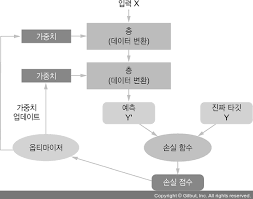

In [37]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
train_images = train_images.reshape((60000, 28*28))  #훈련 데이터 60000장
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28*28))    #테스트 데이터 10000장
#reshape하는 이유 : 이미지는 2차원으로 되어 있는데 2차원 이미지를 1차원 벡터로 쭉 나열하기 위해서
test_images = test_images.astype("float32") / 255

(60000, 28, 28)


In [34]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"), #2개의 dense 층으로 구성, 512개 차원 mapping
    layers.Dense(10, activation="softmax") #출력은 10개 노드로 출력, 분류 모델이므로 softmax 함수 이용
])

In [35]:
model.compile(optimizer="rmsprop", #경사하강법 방식은 rmsprop 최적화 방식에 의해 결정
              loss="sparse_categorical_crossentropy", #다중 분류 손실함수 적용
              metrics=["accuracy"])

In [36]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) #총 feedforward 횟수 : 60000/128x5번 128개씩 묶음.

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 0.2618 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1063 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0510 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9885


### 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [38]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation): #생성자 파트
    #입력 차원, 출력 차원, 활성화 함수 등을 정의
        self.activation = activation

        w_shape = (input_size, output_size) #랜덤한 값으로 초기화된 (in, out) 크기의 행렬 생성
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,) #bias 편향
        b_initial_value = tf.zeros(b_shape) #0으로 초기화된 (output,)크기의 벡터 생성
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs): #여기서 텐서 연산 feedforward 진행
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self): #층마다 가중치 뽑아내는 메서드
        return [self.W, self.b]

#### 단순한 Sequential 클래스

In [39]:
class NaiveSequential:
#각 모델의 층을 연결하는 클래스 정의
    def __init__(self, layers): #층의 개수 입력받
        self.layers = layers

    def __call__(self, inputs): #매직 매소드-> 층을 순서대로 호출
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property #각 층의 파라미터들을 추출
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights #각 층마다의 파라미터 더함
       return weights

In [40]:
model = NaiveSequential([ #위 2개의 클래스를 활용하여 케라스 모델 직접 생성 가능
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### 배치 제너레이터

In [41]:
import math

#미니 배치만큼 값을 뽑아내는 클래스 정의부
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128): #생성자 파트
        #배치사이즈, 인덱스, 레이블, 배치의 개수 등을 정의
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        #다음 배치들을 불러오는 메소드
        images = self.images[self.index : self.index + self.batch_size]
        #배치 사이즈만큼 이미지 인덱스를 인덱싱해주세요
        labels = self.labels[self.index : self.index + self.batch_size]
        #라벨도 마찬가지의 방법 적용
        self.index += self.batch_size #128개씩 인덱스에 더함으로써 어디까지 진행했는지 파악
        return images, labels

### 훈련 스텝 실행하기

In [42]:
def one_training_step(model, images_batch, labels_batch):
#훈련 스텝 메소드 : 배치 데이터에서 모델을 실행하고 가중치를 업뎃하는 작업
    with tf.GradientTape() as tape: #그래디언트 테잎 활용
        predictions = model(images_batch) #모델의 예측 계산
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses) #샘플들의 손실을 평균하여 assign
    gradients = tape.gradient(average_loss, model.weights) #현재 손실, w값이용하여 그래디언트 값 계산
    update_weights(gradients, model.weights) #그래디언트를 이용하여 weight값 업뎃
    return average_loss #차이 리턴

In [43]:
learning_rate = 1e-3 #사용자가 정해주는 파라미터 : 학습률

def update_weights(gradients, weights): #gradient가지고 가중치 업뎃하는 메소드
    for g, w in zip(gradients, weights): #zip으로 묶어서 하나씩 풀어주세요.
        w.assign_sub(g * learning_rate) # w = w - g*learning_rate와 동일한 수식

In [46]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights): #실제로는 다음과 같은 케라스내부의 optimizer 인스턴스의 apply_gradients 함수를 적용한다.
    optimizer.apply_gradients(zip(gradients, weights))

### 전체 훈련 루프

In [48]:
def fit(model, images, labels, epochs, batch_size=128): #fit 함수 -> 실제 훈련 스텝을 하나씩 반복하는 함수
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels) #메소드 호출
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next() #배치 데이터 값들 추출
            loss = one_training_step(model, images_batch, labels_batch) #메소드 추출하여 loss값 리턴
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}") #n*100번째 batch 마다 loss 출력

In [55]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128) #fit 함수 호출하여 실제 훈련 진행

에포크 0
0번째 배치 손실: 0.64
100번째 배치 손실: 0.66
200번째 배치 손실: 0.56
300번째 배치 손실: 0.63
400번째 배치 손실: 0.71
에포크 1
0번째 배치 손실: 0.60
100번째 배치 손실: 0.62
200번째 배치 손실: 0.52
300번째 배치 손실: 0.60
400번째 배치 손실: 0.68
에포크 2
0번째 배치 손실: 0.57
100번째 배치 손실: 0.59
200번째 배치 손실: 0.50
300번째 배치 손실: 0.57
400번째 배치 손실: 0.66
에포크 3
0번째 배치 손실: 0.55
100번째 배치 손실: 0.56
200번째 배치 손실: 0.47
300번째 배치 손실: 0.55
400번째 배치 손실: 0.64
에포크 4
0번째 배치 손실: 0.53
100번째 배치 손실: 0.54
200번째 배치 손실: 0.45
300번째 배치 손실: 0.53
400번째 배치 손실: 0.62
에포크 5
0번째 배치 손실: 0.51
100번째 배치 손실: 0.52
200번째 배치 손실: 0.44
300번째 배치 손실: 0.51
400번째 배치 손실: 0.61
에포크 6
0번째 배치 손실: 0.50
100번째 배치 손실: 0.50
200번째 배치 손실: 0.42
300번째 배치 손실: 0.50
400번째 배치 손실: 0.60
에포크 7
0번째 배치 손실: 0.48
100번째 배치 손실: 0.48
200번째 배치 손실: 0.41
300번째 배치 손실: 0.48
400번째 배치 손실: 0.58
에포크 8
0번째 배치 손실: 0.47
100번째 배치 손실: 0.47
200번째 배치 손실: 0.39
300번째 배치 손실: 0.47
400번째 배치 손실: 0.57
에포크 9
0번째 배치 손실: 0.46
100번째 배치 손실: 0.45
200번째 배치 손실: 0.38
300번째 배치 손실: 0.46
400번째 배치 손실: 0.57


### 모델 평가하기

In [60]:
predictions = model(test_images) #테스트 셋 이용하여 모델에 넣기(여기서는 학습 안함!!!), 학습된 모델에 단순 집어넣는거
predictions = predictions.numpy() #numpy로 만들어서 할당
print(predictions.shape) #(10000, 10)
predicted_labels = np.argmax(predictions, axis=1) #1 dimension을 기준으로 해서 가장 큰 값의 인덱스를 뽑아줌
print(predicted_labels) #[7 2 1 ... 4 5 6]
print(predicted_labels.shape) #(10000,) -> 가장 큰 값의 인덱스 10000개를 1d 배열로 가지고 있음.
matches = predicted_labels == test_labels #각각의 정답과 비교하여 matches라는 리스트에 1 또는 0 (true or false) 값 저장
print(matches)
print(f"정확도: {matches.mean():.2f}") #정확도: 0.86

(10000, 10)
[7 2 1 ... 4 5 6]
(10000,)
[ True  True  True ...  True  True  True]
정확도: 0.86


## 요약

*   텐서는 머신 러닝 및 딥러닝 시스템의 기초 자료구조 중 하나이다.  
*   텐서는 dtype, ndim, shape 속성 등을 제공한다.
*   텐서 연산(reshape, matmul, 덧셈, broadcast) 등을 통해 텐서의 모양을 파악하고 자유롭게 조작가능함.  
*   학습이란, 훈련 데이터 샘플과 그에 대응하는 정답(지도학습 경우)이 주어졌을 때, 손실함수를 가장 최소화 하는 파라미터를 찾아가는 과정이라고 볼 수 있다.  
*   데이터 샘플에 대해 일일이 loss값 계산 및 backward연산을 진행하면 한번 도는데 시간은 짧게 걸리지만 전체적으로 봤을 때, 지그재그 형식으로 움직이기 때문에 전체 훈련 시간이 오래 걸릴 수 있다. 또. 모든 데이터의 그래디언트 계산 및 가중치를 한꺼번에 업뎃하는 방식은 한 번 iteration 하는데 걸리는 시간이 오래 걸린다. 따라서 미니 배치 사이즈로 나누어서 feedforward, backward를 진행한다. 이를 **미니 배치 경사 하강법**이라고 한다.
*   학습 과정은 신경망의 텐서 그래프 및 연산들이 미분가능하기 때문에 가능한 일이다. 따라서 현재 파라미터와 배치를 그래디언트 값에 mapping 시켜주기 위해 연쇄 법칙을 이용한다. (지워지고 지워지는 방식). 이를 역전파라고 한다.
